In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

## height data set from combined features-pops

In [2]:
h_combined = pd.read_csv("C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\POPS\\new_run_height\\output\\gene_output_height.preds", sep = '\t')
h_combined

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
0,ENSG00000186092,-0.660061,NaN,NaN,False,False,False
1,ENSG00000235249,-0.657422,NaN,NaN,False,False,False
2,ENSG00000185097,-0.653048,NaN,NaN,False,False,False
3,ENSG00000187634,0.596396,NaN,NaN,False,False,False
4,ENSG00000188976,0.278404,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...
18378,ENSG00000165724,0.234746,0.90812,-1.609128,True,True,True
18379,ENSG00000197070,0.496823,-0.49512,-2.704159,True,True,True
18380,ENSG00000203993,0.183933,0.58284,-1.448793,True,True,True
18381,ENSG00000181090,0.715844,1.81330,-1.488304,True,True,True


In [3]:
h_combined = h_combined.sort_values(by = 'PoPS_Score', ascending = False)
h_combined

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
4305,ENSG00000139219,4.637700,6.98730,3.756305,True,True,True
16513,ENSG00000164692,4.268547,7.63150,4.352896,True,True,True
16708,ENSG00000106034,4.206589,9.03960,5.409813,True,True,True
12797,ENSG00000114737,3.964449,14.93300,13.032016,True,True,True
4589,ENSG00000156076,3.833405,7.33790,4.209473,True,True,True
...,...,...,...,...,...,...,...
5898,ENSG00000257341,-3.160369,NaN,NaN,False,False,False
13826,ENSG00000109321,-3.311218,NaN,NaN,False,False,False
14542,ENSG00000175471,-3.374620,-0.75233,-4.581886,True,True,True
9414,ENSG00000167641,-3.531422,-0.35846,-1.863294,True,True,True


In [4]:
#h_combined = h_combined.iloc[:500]
#h_combined

## load downstreamer dataset for height

In [11]:
file = "C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\downstreamer\\downstreamer_height.csv"
h_dn =  pd.read_csv(file)
h_dn

,Gene ID,Gene symbol,Chromosome,Band,Start,End,Enrichment Z-score,Enrichment P-value,Enrichment Q-value,Bonferroni significant,FDR 5% significant,Distance to lead GWAS variant,GWAS variant ID,GWAS variant P-value,GWAS gene P-value
0,ENSG00000100196,KDELR3,22,q13.1,38864067,38879452,9.20,3.720000e-20,0.0,True,True,"162,674",rs6001093,1.300000e-10,2.978000e-01
1,ENSG00000166813,KIF7,15,q26.1,90152020,90198682,9.14,6.370000e-20,0.0,True,True,"4,433",rs2350479,9.500000e-23,6.600000e-06
2,ENSG00000164294,GPX8,5,q11.2,54455946,54462899,9.00,2.280000e-19,0.0,True,True,0,rs434658,1.500000e-36,4.520000e-10
3,ENSG00000151135,C12orf23,12,q23.3,107349497,107372556,8.92,4.870000e-19,0.0,True,True,"29,836",rs10861678,1.000000e-34,2.340000e-10
4,ENSG00000149257,SERPINH1,11,q13.5,75273101,75283828,8.82,1.130000e-18,0.0,True,True,0,rs606452,2.500000e-121,1.000000e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19511,ENSG00000152910,CNTNAP4,16,q23.1,76311176,76593135,-9.61,6.920000e-22,0.0,True,True,Trans (>250 kb),NaN,NaN,9.985000e-01
19512,ENSG00000166862,CACNG2,22,q12.3,36959968,37099603,-9.67,4.120000e-22,0.0,True,True,"188,712",rs2294358,1.300000e-09,6.316000e-01
19513,ENSG00000179915,NRXN1,2,p16.3,50145643,51259674,-9.76,1.650000e-22,0.0,True,True,Trans (>250 kb),NaN,NaN,1.000000e+00
19514,ENSG00000184672,RALYL,8,q21.2,85095022,85834079,-9.95,2.480000e-23,0.0,True,True,Trans (>250 kb),NaN,NaN,9.976000e-01


In [6]:
#h_dn = h_dn.iloc[:500]
#h_dn

In [16]:
h_dn = h_dn.rename(columns = {'Gene ID': 'GeneID'})

In [8]:
# what is the overlap? doenstreamer vs combined features

h_dn.GeneID.isin(h_combined.ENSGID).sum()


18029

In [9]:
h_combined_h_dn = h_combined.ENSGID[h_combined.ENSGID.isin(h_dn.GeneID)].values

In [10]:
h_combined_h_dn = h_combined.ENSGID[h_combined.ENSGID.isin(h_dn.GeneID)].values
combined_data = h_combined[h_combined.ENSGID.isin(h_combined_h_dn)][["ENSGID", "PoPS_Score"]]
combined_data

,ENSGID,PoPS_Score
4305,ENSG00000139219,4.637700
16513,ENSG00000164692,4.268547
16708,ENSG00000106034,4.206589
12797,ENSG00000114737,3.964449
4589,ENSG00000156076,3.833405
...,...,...
5898,ENSG00000257341,-3.160369
13826,ENSG00000109321,-3.311218
14542,ENSG00000175471,-3.374620
9414,ENSG00000167641,-3.531422


In [33]:
top_dn = h_dn.iloc[0:500, :]
top_dn.head(10)

,GeneID,Gene symbol,Chromosome,Band,Start,End,Enrichment Z-score,Enrichment P-value,Enrichment Q-value,Bonferroni significant,FDR 5% significant,Distance to lead GWAS variant,GWAS variant ID,GWAS variant P-value,GWAS gene P-value
0,ENSG00000100196,KDELR3,22,q13.1,38864067,38879452,9.20,3.720000e-20,0.0,True,True,"162,674",rs6001093,1.300000e-10,2.978000e-01
1,ENSG00000166813,KIF7,15,q26.1,90152020,90198682,9.14,6.370000e-20,0.0,True,True,"4,433",rs2350479,9.500000e-23,6.600000e-06
2,ENSG00000164294,GPX8,5,q11.2,54455946,54462899,9.00,2.280000e-19,0.0,True,True,0,rs434658,1.500000e-36,4.520000e-10
3,ENSG00000151135,C12orf23,12,q23.3,107349497,107372556,8.92,4.870000e-19,0.0,True,True,"29,836",rs10861678,1.000000e-34,2.340000e-10
4,ENSG00000149257,SERPINH1,11,q13.5,75273101,75283828,8.82,1.130000e-18,0.0,True,True,0,rs606452,2.500000e-121,1.000000e-12
5,ENSG00000065308,TRAM2,6,p12.2,52362200,52441713,8.64,5.860000e-18,0.0,True,True,0,rs910244,6.500000e-09,1.400000e-03
6,ENSG00000141756,FKBP10,17,q21.2,39968932,39979465,8.24,1.770000e-16,0.0,True,True,Trans (>250 kb),NaN,NaN,1.870000e-01
7,ENSG00000141696,LEPREL4,17,q21.2,39958199,39968856,8.09,6.150000e-16,0.0,True,True,Trans (>250 kb),NaN,NaN,1.946000e-01
8,ENSG00000138131,LOXL4,10,q24.2,100007447,100028007,8.00,1.270000e-15,0.0,True,True,0,rs1983864,4.600000e-27,9.360000e-06
9,ENSG00000102038,SMARCA1,X,q25,128580480,128657477,7.93,2.170000e-15,0.0,True,True,Trans (>250 kb),NaN,NaN,NaN


In [32]:
top_h_combined = h_combined.iloc[0:500, :]
top_h_combined.head(10)

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
4305,ENSG00000139219,4.637700,6.9873,3.756305,True,True,True
16513,ENSG00000164692,4.268547,7.6315,4.352896,True,True,True
16708,ENSG00000106034,4.206589,9.0396,5.409813,True,True,True
12797,ENSG00000114737,3.964449,14.9330,13.032016,True,True,True
4589,ENSG00000156076,3.833405,7.3379,4.209473,True,True,True
14654,ENSG00000125347,3.712567,7.1695,4.398465,True,True,True
11057,ENSG00000115457,3.699302,5.2421,2.939381,True,True,True
14635,ENSG00000138829,3.576322,8.1675,4.659276,True,True,True
10244,ENSG00000049323,3.431869,10.3670,6.492244,True,True,True
17958,ENSG00000148120,3.419572,7.8626,4.606701,True,True,True


In [34]:
# what is the overlap?

top_h_combined.ENSGID.isin(top_dn.GeneID).sum()

67

In [37]:
top_h_combined_top_dn = top_h_combined.ENSGID[top_h_combined.ENSGID.isin(top_dn.GeneID)].values

In [38]:
pops_data = top_h_combined[top_h_combined.ENSGID.isin(top_h_combined_top_dn)][["ENSGID", "PoPS_Score"]]
pops_data

,ENSGID,PoPS_Score
17958,ENSG00000148120,3.419572
12965,ENSG00000144810,3.124461
1499,ENSG00000116132,2.967788
4417,ENSG00000167779,2.865032
15915,ENSG00000118523,2.782079
...,...,...
10484,ENSG00000152284,1.533269
11049,ENSG00000115414,1.522557
4745,ENSG00000166598,1.507876
4228,ENSG00000123094,1.489998


In [42]:
downstreamer_data = top_dn[top_dn.GeneID.isin(top_h_combined_top_dn)][["GeneID", "Enrichment Z-score"]]
downstreamer_data

,GeneID,Enrichment Z-score
4,ENSG00000149257,8.82
13,ENSG00000106333,7.48
17,ENSG00000187079,7.33
19,ENSG00000154380,7.23
22,ENSG00000148737,7.14
...,...,...
462,ENSG00000233608,4.56
464,ENSG00000122786,4.55
466,ENSG00000166598,4.55
483,ENSG00000197256,4.51


In [43]:
pops_data = pops_data.sort_values(by = 'ENSGID', ascending = False)
pops_data

,ENSGID,PoPS_Score
11230,ENSG00000233608,2.042742
5486,ENSG00000198807,1.915214
9002,ENSG00000197256,1.785227
2976,ENSG00000187079,1.647637
17456,ENSG00000182197,1.624584
...,...,...
4009,ENSG00000078246,1.689942
4155,ENSG00000070018,1.626510
10134,ENSG00000068697,2.681084
8341,ENSG00000035862,1.844777


In [45]:
downstreamer_data = downstreamer_data.sort_values(by = 'GeneID', ascending = False)
downstreamer_data

,GeneID,Enrichment Z-score
462,ENSG00000233608,4.56
395,ENSG00000198807,4.71
483,ENSG00000197256,4.51
17,ENSG00000187079,7.33
45,ENSG00000182197,6.49
...,...,...
72,ENSG00000078246,6.19
104,ENSG00000070018,5.91
153,ENSG00000068697,5.62
132,ENSG00000035862,5.72


-0.022362018286575136


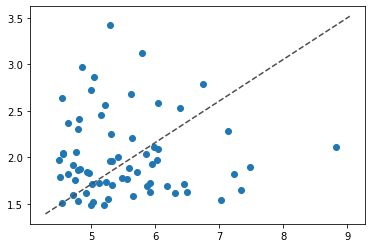

In [46]:
from scipy.stats import pearsonr
x = downstreamer_data['Enrichment Z-score']
y = pops_data["PoPS_Score"]

plt.scatter(x, y)
diag_line, = plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
print(np.corrcoef(x=x, y=y)[0, 1])

plt.show()

## compare downstreamer with pops paper result for height

In [47]:
df = pd.read_csv("D:\Public_PoPS_data\PoPS_FullResults.txt", sep = "\t")
df

,trait,cohort,ensgid,gene,chromosome,start,end,tss,pops_score
0,ADHD,PASS,ENSG00000186092,OR4F5,1,69091,70008,69091,-0.114066
1,ADHD,PASS,ENSG00000235249,OR4F29,1,367640,368634,367640,-0.039597
2,ADHD,PASS,ENSG00000185097,OR4F16,1,621059,622053,622053,-0.101550
3,ADHD,PASS,ENSG00000187634,SAMD11,1,860260,879955,860260,-0.197234
4,ADHD,PASS,ENSG00000188976,NOC2L,1,879584,894689,894689,0.018539
...,...,...,...,...,...,...,...,...,...
2077274,Worry_Too_Long,UKB,ENSG00000008735,MAPK8IP2,22,51039114,51052409,51039114,0.442074
2077275,Worry_Too_Long,UKB,ENSG00000100299,ARSA,22,51061182,51066607,51066607,-0.173632
2077276,Worry_Too_Long,UKB,ENSG00000251322,SHANK3,22,51112843,51171726,51112843,0.178315
2077277,Worry_Too_Long,UKB,ENSG00000100312,ACR,22,51176624,51183762,51176624,-0.032301


In [48]:
# we only analyse the breaker fruits
df_height = df[df['trait'].str.contains('Height')]
df_height

,trait,cohort,ensgid,gene,chromosome,start,end,tss,pops_score
1102980,Height,UKB,ENSG00000186092,OR4F5,1,69091,70008,69091,-0.669761
1102981,Height,UKB,ENSG00000235249,OR4F29,1,367640,368634,367640,-0.519005
1102982,Height,UKB,ENSG00000185097,OR4F16,1,621059,622053,622053,-0.536949
1102983,Height,UKB,ENSG00000187634,SAMD11,1,860260,879955,860260,0.662825
1102984,Height,UKB,ENSG00000188976,NOC2L,1,879584,894689,894689,0.866602
...,...,...,...,...,...,...,...,...,...
1121358,Height,UKB,ENSG00000008735,MAPK8IP2,22,51039114,51052409,51039114,-0.276992
1121359,Height,UKB,ENSG00000100299,ARSA,22,51061182,51066607,51066607,0.604702
1121360,Height,UKB,ENSG00000251322,SHANK3,22,51112843,51171726,51112843,0.251378
1121361,Height,UKB,ENSG00000100312,ACR,22,51176624,51183762,51176624,-0.381391


In [49]:
h_paper = df_height.sort_values(by = 'pops_score', ascending = False)

In [50]:
# what is the overlap? doenstreamer vs combined features

h_dn.GeneID.isin(h_paper.ensgid).sum()

18029

In [51]:
h_paper_h_dn = h_paper.ensgid[h_paper.ensgid.isin(h_dn.GeneID)].values

In [52]:
paper_data = h_paper[h_paper.ensgid.isin(h_paper_h_dn)][["ensgid", "pops_score"]]
paper_data

,ensgid,pops_score
1115066,ENSG00000150991,11.338518
1114419,ENSG00000139219,4.923083
1110905,ENSG00000077782,4.780095
1112915,ENSG00000167244,4.746317
1110034,ENSG00000106571,4.249257
...,...,...
1108008,ENSG00000169862,-2.199736
1103635,ENSG00000162374,-2.247568
1117933,ENSG00000126353,-2.276648
1111055,ENSG00000170323,-2.322960


In [54]:
top_paper = h_paper.iloc[0:500, :]
top_paper

,trait,cohort,ensgid,gene,chromosome,start,end,tss,pops_score
1115066,Height,UKB,ENSG00000150991,UBC,12,125396150,125401914,125401914,11.338518
1114419,Height,UKB,ENSG00000139219,COL2A1,12,48366748,48398269,48398269,4.923083
1110905,Height,UKB,ENSG00000077782,FGFR1,8,38268656,38326352,38326352,4.780095
1112915,Height,UKB,ENSG00000167244,IGF2,11,2150342,2170833,2170833,4.746317
1110034,Height,UKB,ENSG00000106571,GLI3,7,42000548,42277469,42277469,4.249257
...,...,...,...,...,...,...,...,...,...
1114653,Height,UKB,ENSG00000123384,LRP1,12,57522276,57607134,57522276,1.442606
1107398,Height,UKB,ENSG00000197712,FAM114A1,4,38869298,38947360,38869298,1.442572
1115336,Height,UKB,ENSG00000183098,GPC6,13,93879095,95059655,93879095,1.438889
1106023,Height,UKB,ENSG00000123989,CHPF,2,220403669,220408509,220408509,1.438230


## overlap between the result of downstreamer and pops paper for height

In [56]:
# what is the overlap? between the result of pops paper for height and the result of downstreamer for height

top_paper.ensgid.isin(top_dn.GeneID).sum()

75

## overlap between the first 50 genes of downstreamer and pops for height

In [66]:
top_paper50 = h_paper.iloc[0:50, :]
top_paper50.head(5)

,trait,cohort,ensgid,gene,chromosome,start,end,tss,pops_score
1115066,Height,UKB,ENSG00000150991,UBC,12,125396150,125401914,125401914,11.338518
1114419,Height,UKB,ENSG00000139219,COL2A1,12,48366748,48398269,48398269,4.923083
1110905,Height,UKB,ENSG00000077782,FGFR1,8,38268656,38326352,38326352,4.780095
1112915,Height,UKB,ENSG00000167244,IGF2,11,2150342,2170833,2170833,4.746317
1110034,Height,UKB,ENSG00000106571,GLI3,7,42000548,42277469,42277469,4.249257


In [67]:
top_dn50 = h_dn.iloc[0:50, :]
top_dn50.head(5)

,GeneID,Gene symbol,Chromosome,Band,Start,End,Enrichment Z-score,Enrichment P-value,Enrichment Q-value,Bonferroni significant,FDR 5% significant,Distance to lead GWAS variant,GWAS variant ID,GWAS variant P-value,GWAS gene P-value
0,ENSG00000100196,KDELR3,22,q13.1,38864067,38879452,9.20,3.720000e-20,0.0,True,True,"162,674",rs6001093,1.300000e-10,2.978000e-01
1,ENSG00000166813,KIF7,15,q26.1,90152020,90198682,9.14,6.370000e-20,0.0,True,True,"4,433",rs2350479,9.500000e-23,6.600000e-06
2,ENSG00000164294,GPX8,5,q11.2,54455946,54462899,9.00,2.280000e-19,0.0,True,True,0,rs434658,1.500000e-36,4.520000e-10
3,ENSG00000151135,C12orf23,12,q23.3,107349497,107372556,8.92,4.870000e-19,0.0,True,True,"29,836",rs10861678,1.000000e-34,2.340000e-10
4,ENSG00000149257,SERPINH1,11,q13.5,75273101,75283828,8.82,1.130000e-18,0.0,True,True,0,rs606452,2.500000e-121,1.000000e-12


In [68]:
# what is the overlap? between the result of pops paper for height and the result of downstreamer for height

top_paper50.ensgid.isin(top_dn50.GeneID).sum()

2

## scatter plot

In [57]:
top_paper_top_dn = top_paper.ensgid[top_paper.ensgid.isin(top_dn.GeneID)].values

In [58]:
paper_data = top_paper[top_paper.ensgid.isin(top_paper_top_dn)][["ensgid", "pops_score"]]
paper_data

,ensgid,pops_score
1110034,ENSG00000106571,4.249257
1118185,ENSG00000108821,3.640234
1105597,ENSG00000074047,3.508484
1114269,ENSG00000070018,3.482529
1103260,ENSG00000142798,3.474698
...,...,...
1119116,ENSG00000197256,1.461295
1106492,ENSG00000173402,1.457886
1120988,ENSG00000244486,1.447786
1114653,ENSG00000123384,1.442606


In [60]:
downstreamer_data2 = top_dn[top_dn.GeneID.isin(top_paper_top_dn)][["GeneID", "Enrichment Z-score"]]
downstreamer_data2

,GeneID,Enrichment Z-score
0,ENSG00000100196,9.20
8,ENSG00000138131,8.00
13,ENSG00000106333,7.48
17,ENSG00000187079,7.33
22,ENSG00000148737,7.14
...,...,...
461,ENSG00000176692,4.56
464,ENSG00000122786,4.55
472,ENSG00000165458,4.54
483,ENSG00000197256,4.51


In [61]:
downstreamer_data2 = downstreamer_data2.sort_values(by = 'GeneID', ascending = False)
downstreamer_data2

,GeneID,Enrichment Z-score
226,ENSG00000244486,5.25
194,ENSG00000204262,5.38
138,ENSG00000197712,5.68
57,ENSG00000197594,6.36
483,ENSG00000197256,4.51
...,...,...
309,ENSG00000074047,4.93
104,ENSG00000070018,5.91
71,ENSG00000054598,6.22
249,ENSG00000039560,5.18


In [59]:
paper_data = paper_data.sort_values(by = 'ensgid', ascending = False)
paper_data

,ensgid,pops_score
1120988,ENSG00000244486,1.447786
1105839,ENSG00000204262,2.094273
1107398,ENSG00000197712,1.442572
1109644,ENSG00000197594,1.603994
1119116,ENSG00000197256,1.461295
...,...,...
1105597,ENSG00000074047,3.508484
1114269,ENSG00000070018,3.482529
1108813,ENSG00000054598,2.908888
1108041,ENSG00000039560,1.522800


0.02654427126173149


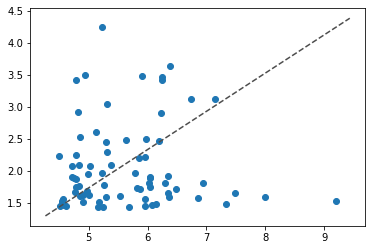

In [63]:
from scipy.stats import pearsonr
x = downstreamer_data2['Enrichment Z-score']
y = pops_data["pops_score"]

plt.scatter(x, y)
diag_line, = plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
print(np.corrcoef(x=x, y=y)[0, 1])

plt.show()